# Домашняя работа по теории вероятностей #

Выполнил:
   
*Ивлиев Иван Дмитриевич*
    
Группа БЭК151

In [1]:
import pandas as pd

In [2]:
import scipy.stats as stats

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [85]:
import bokeh as bk

In [86]:
from statsmodels.graphics.gofplots import qqplot

In [7]:
from pandas.tools.plotting import radviz,scatter_matrix,bootstrap_plot,parallel_coordinates
from numpy.random import randn
from pylab import *
from matplotlib import rcParams

In [110]:
%matplotlib inline

In [9]:
matplotlib.style.use('ggplot')

## Задание №1 ##

Добавляю массив данных по индексу **"Биг-Мака"** для России за последние 16 лет. Индекс **Биг-Мака** представляет собой стоимость Биг-Мака в разных странах. Он используется для измерениz паритета покупательной способности в разных старнах.

In [10]:
bigmac = pd.read_csv("/Users/Ivanchester/Desktop/prob/big-mac.csv")

In [148]:
bigmac.head()

,#,Year,Local_Price,Dollar_Ex,Dollar_Price,Dollar_PPP,DollarUSA
0,1,2000,39.5,28.5,1.39,15.74,2.51
1,2,2001,35.0,28.9,1.21,21.65,2.54
2,3,2002,39.0,31.2,1.25,15.66,2.49
3,4,2003,41.0,31.1,1.31,15.13,2.71
4,5,2004,42.0,29.0,1.45,14.48,2.90


Таблица состоит из 7 колонок.

1) Номер

2) Год

3) Цена в рублях

4) Курс доллара

5) Цена в долларах

6) Цена по паритету

7) Цена в США

In [13]:
bigmac.describe()

,#,Year,Local_Price,Dollar_Ex,Dollar_Price,Dollar_PPP,DollarUSA
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,9.000000,2008.000000,64.617647,33.224706,1.935882,17.824118,3.598824
std,5.049752,5.049752,26.973094,10.590790,0.518219,3.179778,0.867013
min,1.000000,2000.000000,35.000000,23.230000,1.210000,13.730000,2.490000
25%,5.000000,2004.000000,42.000000,28.410000,1.450000,15.480000,2.900000
50%,9.000000,2008.000000,59.000000,30.440000,2.030000,17.330000,3.570000
75%,13.000000,2012.000000,75.000000,32.800000,2.330000,19.020000,4.330000
max,17.000000,2016.000000,130.000000,63.410000,2.700000,25.800000,5.040000


In [14]:
bigmac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
#               17 non-null int64
Year            17 non-null int64
Local_Price     17 non-null float64
Dollar_Ex       17 non-null float64
Dollar_Price    17 non-null float64
Dollar_PPP      17 non-null float64
DollarUSA       17 non-null float64
dtypes: float64(5), int64(2)
memory usage: 1.0 KB


In [15]:
bigmac.Year

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
Name: Year, dtype: int64

Построим 3 графика, показывающие: как изменялись цены на Биг-Мак в рублях, в долларах и 

In [16]:
sns.set()

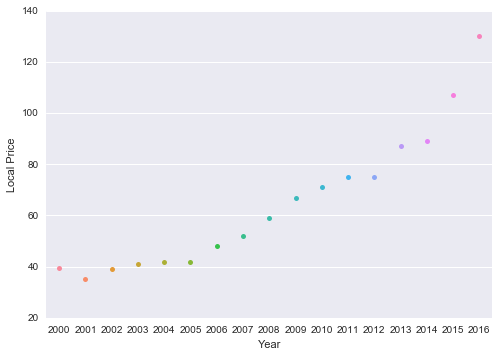

In [17]:
_ = sns.swarmplot(data=bigmac, x='Year', y='Local_Price')
_ = plt.xlabel('Year')
_ = plt.ylabel('Local Price')

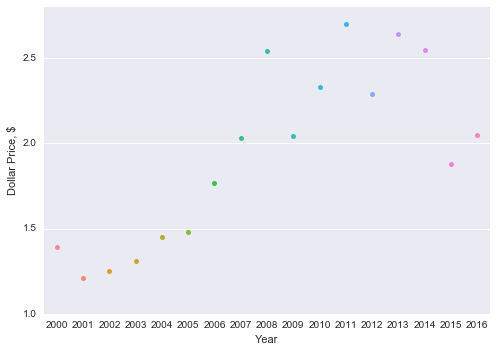

In [18]:
_ = sns.swarmplot(data=bigmac, x='Year', y='Dollar_Price')
_ = plt.xlabel('Year')
_ = plt.ylabel('Dollar Price, $')

In [19]:
bigmac_1 = pd.DataFrame({'Year' : bigmac.Year, 'Dollar PPP' : bigmac.Dollar_PPP})

In [20]:
bigmac_1

,Dollar PPP,Year
0,15.74,2000
1,21.65,2001
2,15.66,2002
3,15.13,2003
4,14.48,2004
5,13.73,2005
6,15.48,2006
7,15.25,2007
8,16.53,2008
9,18.77,2009


In [21]:
sns.set()

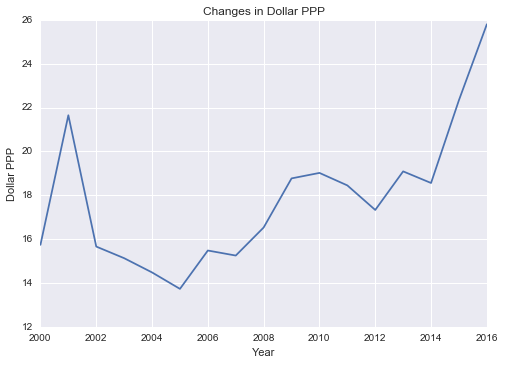

In [22]:
plt.plot(bigmac.Year, bigmac.Dollar_PPP)
plt.xlabel('Year')
plt.ylabel('Dollar PPP')
plt.title(r'Changes in Dollar PPP')

Теперь создадим переменную *bigmac.indollars*, которая будет равна отношению цены в рублях (в России) к цене в долларах (в США): $\frac{Local Price}{Dollar USA}$. Данную цену сравним с реальным курсом доллара: *Dollar_Ex*

In [23]:
bigmac.indollars = bigmac.Local_Price / bigmac.DollarUSA

In [24]:
bigmac.indollars

0     15.737052
1     13.779528
2     15.662651
3     15.129151
4     14.482759
5     13.725490
6     15.483871
7     15.249267
8     16.526611
9     18.767507
10    19.034853
11    18.427518
12    17.321016
13    19.078947
14    18.541667
15    22.338205
16    25.793651
dtype: float64

In [25]:
bigmac_2 = pd.DataFrame({'Dollar to Rubble' : bigmac.Dollar_Ex, 'In dollars' : bigmac.indollars})

In [26]:
bigmac_2

,Dollar to Rubble,In dollars
0,28.50,15.737052
1,28.90,13.779528
2,31.20,15.662651
3,31.10,15.129151
4,29.00,14.482759
5,28.41,13.725490
6,27.06,15.483871
7,25.65,15.249267
8,23.23,16.526611
9,32.80,18.767507


In [27]:
sns.set(style="darkgrid")

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


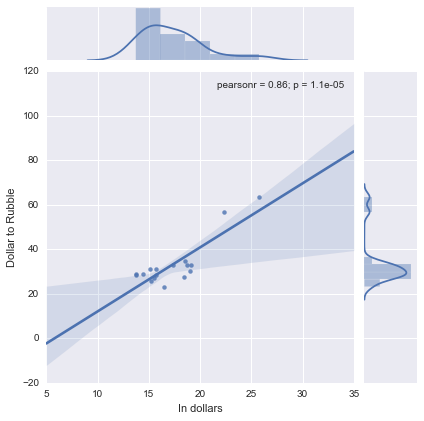

In [28]:
sns.jointplot(data=bigmac_2, x='In dollars', y='Dollar to Rubble', kind='reg')

Данный график показывает, что обменные курсы между рублем и долларом не точны. В идеале, все значения должны были лежать на одной прямой, показывающей регрессию. В данном случае, корреляция между величинами равна 0,86, а должна равняться 1. Сейчас покажу, какими были бы значения при совпадении индекса **"Биг-Мака"** с обменным курсом:

In [29]:
bigmac.indollars_1 = bigmac.Local_Price / bigmac.Dollar_Price

In [30]:
bigmac_3 = pd.DataFrame({'Dollar to Rubble' : bigmac.Dollar_Ex, 'In dollars_1' : bigmac.indollars_1})

In [31]:
bigmac_3

,Dollar to Rubble,In dollars_1
0,28.50,28.417266
1,28.90,28.925620
2,31.20,31.200000
3,31.10,31.297710
4,29.00,28.965517
5,28.41,28.378378
6,27.06,27.118644
7,25.65,25.615764
8,23.23,23.228346
9,32.80,32.843137


//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


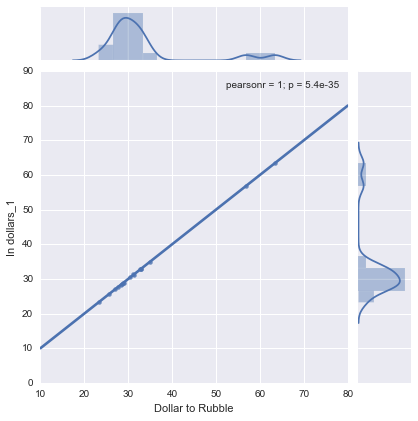

In [89]:
sns.jointplot(data=bigmac_3, x='Dollar to Rubble', y='In dollars_1', kind='reg')

в данном случае все точки лежат на прямой регрессии. Корреляция равна 1.

Теперь проведем сравнение индекса **Биг-Мака** с российским аналогом: ***Индексом Оливье***.
И. Оливье появился совсем недавно в 2010 году. Он показывает стоимость приготовления Оливье. Данные составлены только для России. Используемые данные за первые несколько лет могут быть не совсем корректны, поскольку составлялись не профессионалами, а обычными журналистами. Более того, журнал donbass.UA, который провел данное исследование, - украинский. Поэтому также проведем конвертацию валют: из гривен в рубли (пренебрегая разницей в ценах в России и на Украине).
Позже сравним его с ИПЦ (с сайта Росстата) и индексом **Биг-Мака**.

In [41]:
olivie = np.array([163.4,158.88,162,242.82,257.17,304.72,310.06])

In [42]:
olivie

array([ 163.4 ,  158.88,  162.  ,  242.82,  257.17,  304.72,  310.06])

In [39]:
years = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [40]:
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [45]:
cpi = np.array([106.1,114.2,102.01,108.55,106.54,120.73,109.18])

In [46]:
cpi

array([ 106.1 ,  114.2 ,  102.01,  108.55,  106.54,  120.73,  109.18])

In [51]:
OLIVIE = pd.DataFrame({'Years' : years, 'Olivie index' : olivie, 'CPI' : cpi})

In [53]:
OLIVIE

,CPI,Olivie index,Years
0,106.10,163.40,2010
1,114.20,158.88,2011
2,102.01,162.00,2012
3,108.55,242.82,2013
4,106.54,257.17,2014
5,120.73,304.72,2015
6,109.18,310.06,2016


Построим на одном графике динамику изменений ИПЦ и стоимости Оливье.

In [187]:
graph = figure(title="Price of Olivie and CPI")
graph.grid.grid_line_alpha=0.3
graph.xaxis.axis_label = 'Year'
graph.yaxis.axis_label = 'Price, CPI'

graph.line(years, olivie, color='#33A02C', legend='Olivie Price')
graph.line(years, cpi, color='#FB9A99', legend='CPI')
graph.legend.location = "top_left"
show(graph)

Проверим, как связаны ИПЦ и цена на Оливье

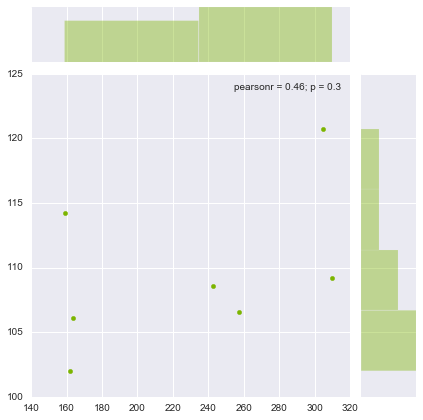

In [99]:
sns.jointplot(olivie, cpi, color="#7CB500")

Величины слабо коррелируют.

Напоследок проверим связь ИПЦ с ценами на ***Оливье*** и на **Биг-Мак** в России.

In [100]:
bigmac.Local_Price

0      39.5
1      35.0
2      39.0
3      41.0
4      42.0
5      42.0
6      48.0
7      52.0
8      59.0
9      67.0
10     71.0
11     75.0
12     75.0
13     87.0
14     89.0
15    107.0
16    130.0
Name: Local_Price, dtype: float64

In [103]:
bmp = np.array([71.0,75.0,75.0,87.0,89.0,107.0,130.0])

In [141]:
final = pd.DataFrame({'Price of Big Mac' : bmp, 'Olivie index' : olivie, 'CPI' : cpi})

In [142]:
final

,CPI,Olivie index,Price of Big Mac
0,106.10,163.40,71.0
1,114.20,158.88,75.0
2,102.01,162.00,75.0
3,108.55,242.82,87.0
4,106.54,257.17,89.0
5,120.73,304.72,107.0
6,109.18,310.06,130.0


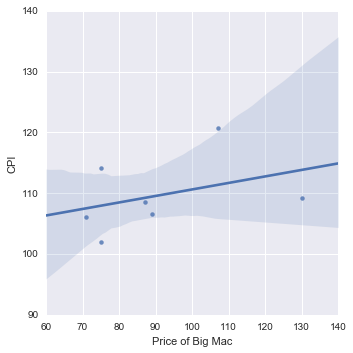

In [146]:
sns.lmplot('Price of Big Mac', 'CPI', data = final)

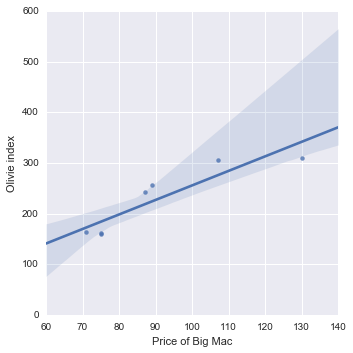

In [145]:
sns.lmplot('Price of Big Mac', 'Olivie index', data = final)

Несмотря на то, что значений очень мало (6), между ними есть зависимость. Действительно, цены Биг-Мака и Оливье коррелируют довольно сильно, в то время как цена Биг-Мака слаба связана с ИПЦ.

In [143]:
from pandas.tools.plotting import radviz

В конце рассмотрим как коррелируют между собой 3 главные величины.

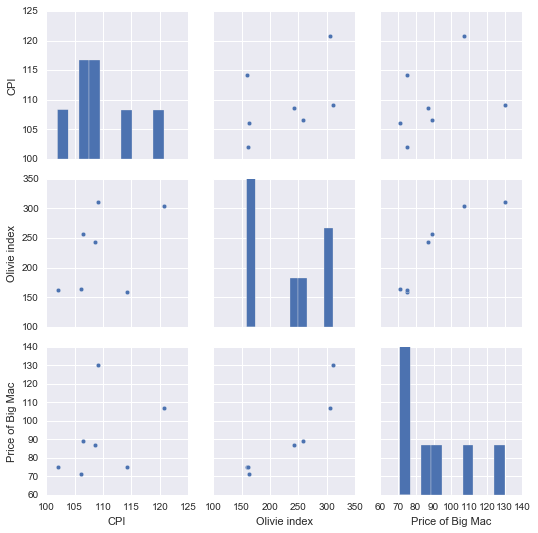

In [144]:
sns.pairplot(final)

Вывод: надо скорее готовить Оливье, пока ингридиенты не подорожали!

## Задание №2 ##

Пусть $X_i$ независимы и $X_i\in U[0; 1]$.
1. Нарисуй гистограмму распределения для $X_1$ , $X_1 + X_2 + X_3$ ,  $\sum_{i=1}^{10}10X_i$ ,  $\sum_{i=1}^{50}50X_i$
2. Оцени $P (X_1 + X_2 + X_3 > 2)$
3. Оцени $E(X_1^5)$, $Var(X_1/1 + X_2^2)$
4. Оцени медиану и 25%-ую квантиль для $(1 + X_1)/(3 + X_2)$



In [149]:
from scipy.stats import uniform

In [150]:
x = stats.uniform(loc = 0, scale = 1)

In [151]:
x1 = x.rvs(100000)
X1 = x.cdf(x1)

Сейчас я построю гистограмму распределения x1

In [153]:
X1

array([ 0.15890353,  0.89436767,  0.80402899, ...,  0.73768044,
        0.89395413,  0.20614936])

Номер 1

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


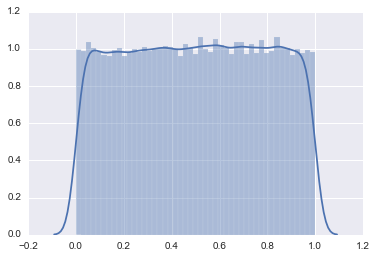

In [155]:
sns.distplot(X1)

Добавим случайные величины X2 и X3

In [156]:
x2 = x.rvs(100000)

In [157]:
x3 = x.rvs(100000)

In [159]:
summation3 = x1 + x2 + x3

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


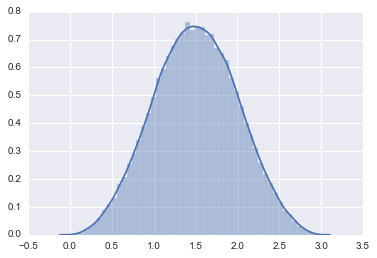

In [160]:
sns.distplot(summation3)

Сумма 10 $X_i$

In [161]:
sum0 = 0

In [162]:
for i in range (1, 11):
    X10 = stats.uniform(0,1)
    Summation10 = X10.rvs(100000)
    sum0 += Summation10

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


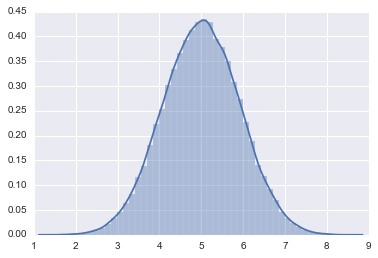

In [163]:
sns.distplot(sum0)

Сумма 50 $X_i$

In [164]:
sum0 = 0

In [165]:
for i in range (1,51):
    X50 = stats.uniform(0,1)
    Summation50 = X50.rvs(100000)
    sum0 +=Summation50

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


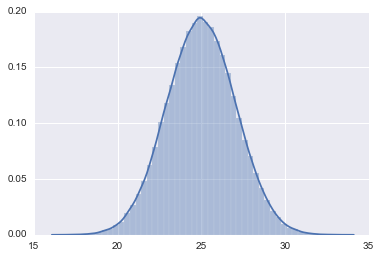

In [166]:
sns.distplot(sum0)

Пункт №2

Используем $X_1, X_2, X_3$ из предыдущего пункта

In [168]:
np.sum(summation3)/(len(summation3))

1.5012449131510806

Пункт №3

Также используем $X_1$ и $X_2$ из пункта 1

Математическое ожидание задается следующим образом:

In [170]:
np.mean(x1 ** 5)

0.16633529424834681

Теперь найдем дисперсию:

In [171]:
np.var(x1 / 1 + x2 **2)

0.17162230443254481

Пункт №4

Думаю, вы поняли, откуда я беру значения $X_1$ и $X_2$

In [172]:
z = (1 + x1)/(3 + x2)

25%-ная квантиль:

In [173]:
q = np.percentile(z, 25)

In [174]:
q

0.3578574210580836

Медиана:

In [175]:
med = np.percentile(z, 50)

In [176]:
med

0.42943949848091068

## Задание №3 ##

### Задача №23 ###

Автобусы приходят на остановку согласно пуассоновскому потоку
в среднем один раз в час. Вася приходит на остановку в случайный момент времени и садится на первый пришедший автобус.
1. Сколько Васе в среднем предстоит ждать автобуса?
2. Сколько в среднем прошло времени от последнего пришедшего автобуса до Васиного появления?
3. Чему равна средняя продолжительность интервала между автобусом, на который сядет Вася, и предыдущим?
4. Чему равна средняя продолжительность интервала между автобусом, на который сядет Вася, и следующим?
5. Маша не любит набитые битком автобусы и никогда не торопится, поэтому, придя на остановку, всегда пропускает один автобус и садится на следующий. Она считает, что на него в среднем сядет меньше людей. Права ли она?

Данная задача решается через Пуассоновкий поток (теория взята из конспекта семинара Белой Розы №11) :

Есть 3 предпосылки:

Возьмем 2 непересекающиxcя интервала времени $I_1$ и $I_2$.

Количество событий в $I_1$ и $I_2$ есть независимые случайные величины. То есть нынешнее состояние никак не прогнозирует будущие результаты. Хотя это иногда в реальности нарушено.

Закон распределения количества событий зависит только от длины временных интервалов. Тоже может быть нарушена.

P(за время $\Delta$ будет ровно 1 событие)= $\lambda \Delta+o(\Delta)$

P(за время $\Delta$ будет 2 и более события)= $o(\Delta)$. Т.е. два и более событий происходят крайне редко.

Если эти предпосылки выполнены, тогда:

время между событиями имеет экспоненциальное распределение: $T_{n}-T_{n-1} \sim exp(\lambda)$

количество событий за единицу времени имеет пуассоновское распределение: $\sim Poiss(\lambda)$

В данном случае $I_i$ - время между автобусом $i$ до автобуса $i+1$

$\lambda=1$

1) Вася мог прийти в любой момент x в интервале (0,$\Delta$). Поэтому с.в. $x \sim U(0,\Delta)$

, где $\Delta$ - время между автобусами.

In [178]:
x = stats.uniform(loc = 0, scale = 1)

In [179]:
x_1 = x.rvs(1000000)

In [180]:
np.mean(x_1)

0.50004113783977822

В среднем автобуса ждать 0,5$\Delta$ часа.

2) В среднем прошло времени от последнего автобуса до Васи - аналогично:

In [181]:
x_2 = x.rvs(1000000)

In [182]:
np.mean(x_2)

0.50003702332230548

От последнего автобуса до Васиного появления в среднем прошло 0,5$\Delta$ часа.

3) Среднее время между автобусами $E(exp(\lambda))$ = $\lambda$ = 1:

In [183]:
from scipy.stats import expon

In [184]:
expon.mean(loc=0, scale=1)

1.0

4) Между этим автобусом и следующим - то же самое, тк $I_1$ и $I_2$ не зависимы. 

In [185]:
expon.mean(loc=0, scale=1)

1.0

5) Насколько я понимаю, величина z [z = количество людей в автобусе] распределена равномерно. То есть, чем дольше едет автобус, тем больше людей в него зайдет.

Т.к. согласно Пуассоновскому потоку, интервалы $I_i$ и $I_{i+1}$ независимы, утверждение Маши неверно. Следующий автобус может приехать как раньше, так и позже нынешнего.

Спасибо за внимание! ***Хорошего дня!!!***